In [1]:
import os
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App/codes')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from functions_EDA import destination_migrants, destination_migrants_top5, total_migration, get_trend, obtenir_tendance
from create_regions import create_regions
import folium
import geopandas as gpd
from shapely.geometry import LineString, MultiPolygon
from matplotlib.colors import Normalize

# Exploratory Data Analysis

## EDA on dataset1

In [2]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
df1 = pd.read_csv('DATA/dataset1.csv')
columns = ['North America', 'Central America', 'South America', 'North Africa', 'Sub-Saharan Africa', 'Northern Europe', 'Western Europe', 
               'Southern Europe', 'Eastern Europe', 'Central Asia', 'Western Asia', 'South Asia', 'East Asia', 'South-East Asia', 'Oceania']
df1.index = columns
df1 = df1[columns] 

In [3]:
df1

,North America,Central America,South America,North Africa,Sub-Saharan Africa,Northern Europe,Western Europe,Southern Europe,Eastern Europe,Central Asia,Western Asia,South Asia,East Asia,South-East Asia,Oceania
North America,96102,208668,68240,4253,58827,248379,279267,551959,162959,85259,131288,158,39145,41758,52303
Central America,3233173,215008,36975,390,2414,42572,81356,190931,4962,3145,6236,14,1754,510,7541
South America,394674,26456,600759,417,19431,68645,157063,1200694,18644,5090,32516,351,110426,2035,28490
North Africa,62193,93,692,57855,12512,22807,404765,442162,5437,1382,367718,1,312,340,6858
Sub-Saharan Africa,478694,793,10738,44230,3717881,483736,430954,312329,6442,2724,305291,243,2918,576,149130
Northern Europe,47627,2770,6125,1255,118260,172448,69445,192786,66783,12912,41223,2,3595,1671,98602
Western Europe,9854,1040,5396,2244,42358,129499,442833,507931,216677,16722,77710,9,1108,4878,18763
Southern Europe,713,449,236,206,12289,7028,14745,15030,13810,1431,7311,4,510,197,1022
Eastern Europe,7455,36,706,125,589,65289,177341,456014,315272,189294,13543,5,11,2,9137
Central Asia,15473,37,258,488,713,15731,131793,33649,193536,1234157,20628,2834,5584,85,944


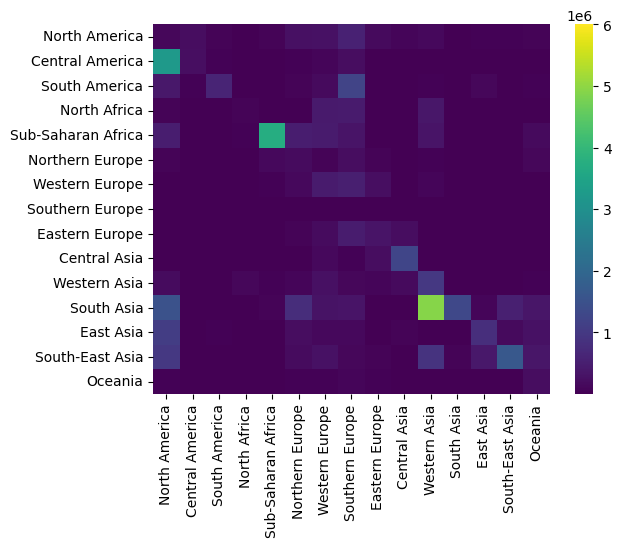

In [5]:
sns.heatmap(df1, cmap="viridis", vmin=1, vmax=6e6, robust = True)
plt.show()

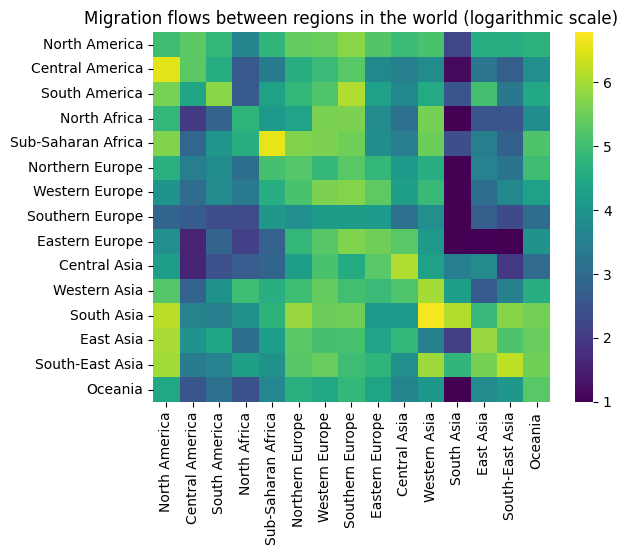

In [6]:
# Logarithmic scale 
log_data = np.log10(df1)
plt.figure()
plt.title("Migration flows between regions in the world (logarithmic scale)")
sns.heatmap(log_data, cmap="viridis", vmin=np.log10(10), vmax=np.log10(6e6))
plt.show()

In [3]:
total_migration(df1)

Destination of migrants 
 
 North America         8082719
Central America        471872
South America          772875
North Africa           232240
Sub-Saharan Africa    4110572
Northern Europe       2525043
Western Europe        3161677
Southern Europe       4632504
Eastern Europe        1203577
Central Asia          1796468
Western Asia          7770135
South Asia            1386896
East Asia             1406739
South-East Asia       2369215
Oceania               1563068
dtype: int64 
 
 
There is 41485600 migrations in total


### Destination of migrants

#### With a pie

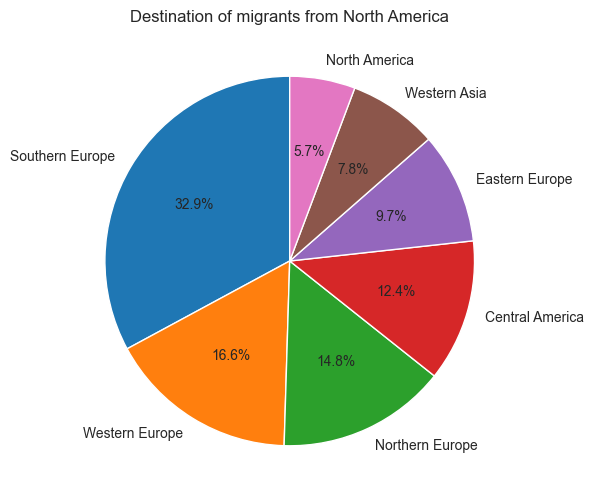

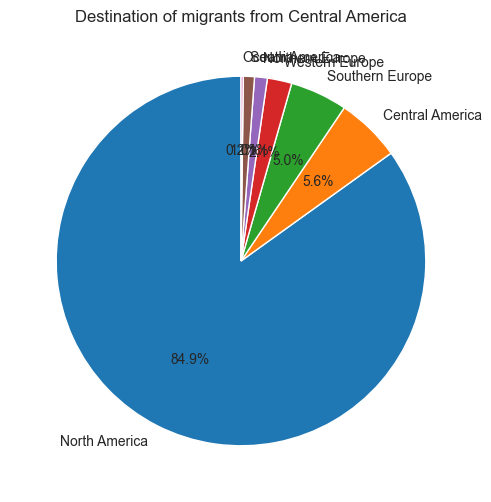

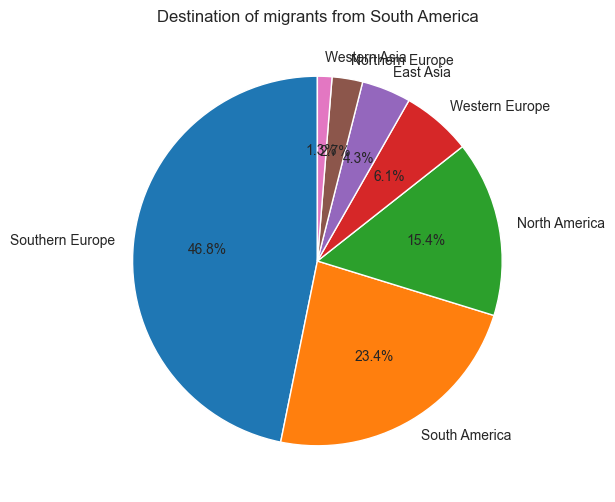

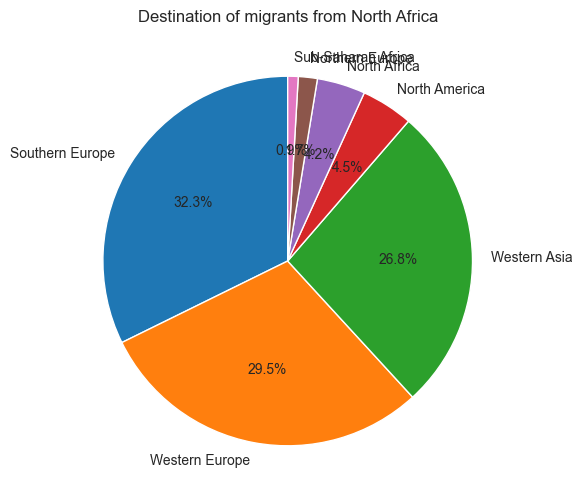

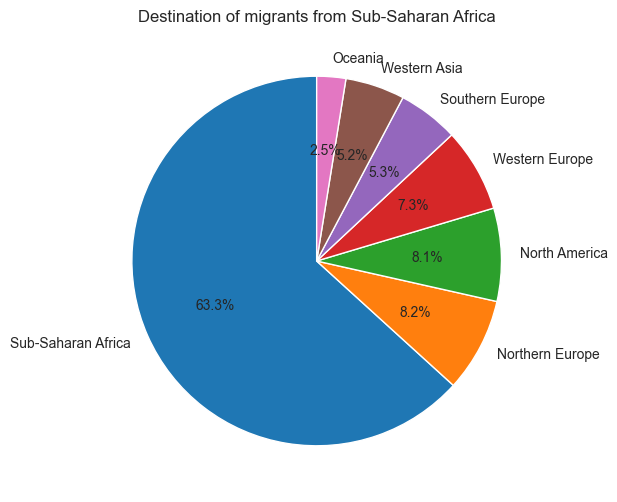

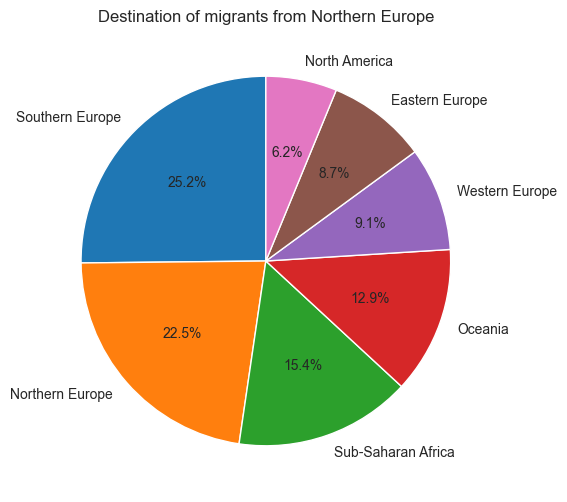

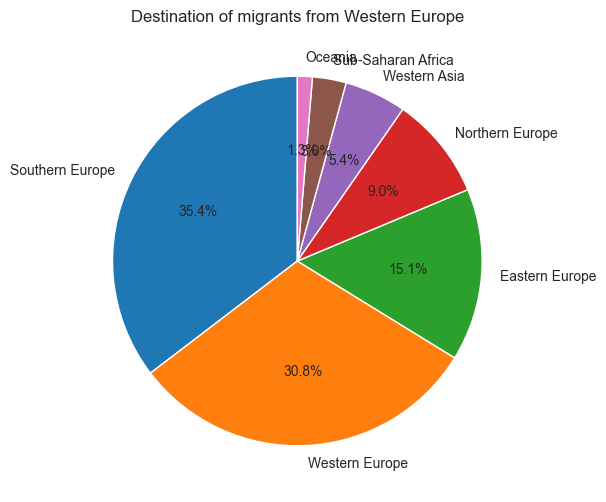

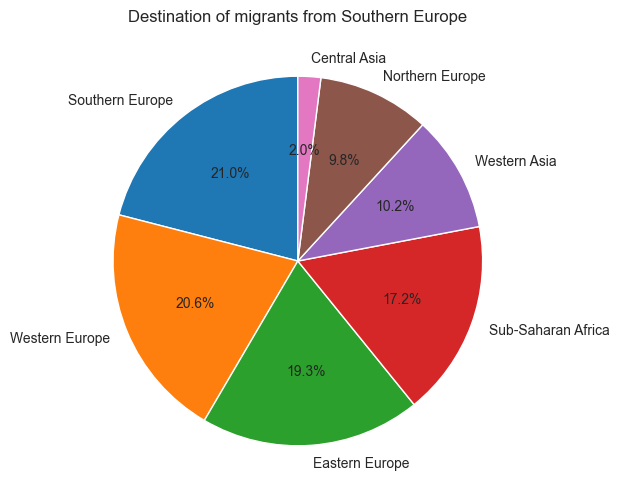

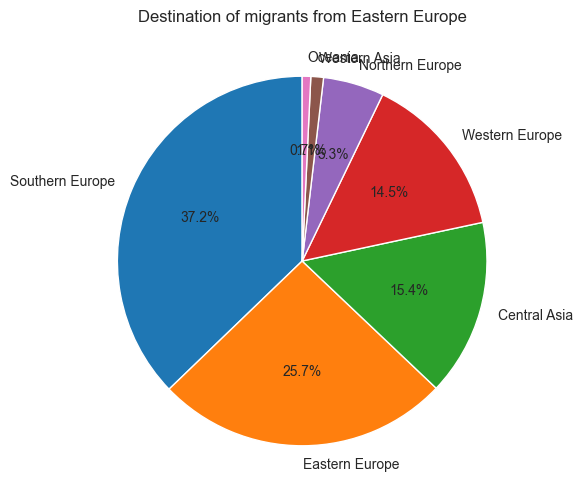

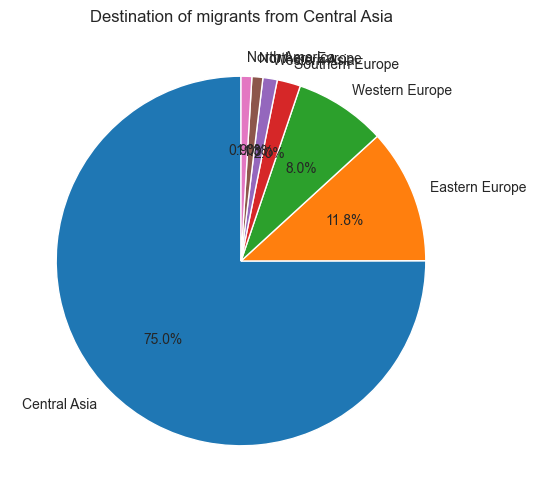

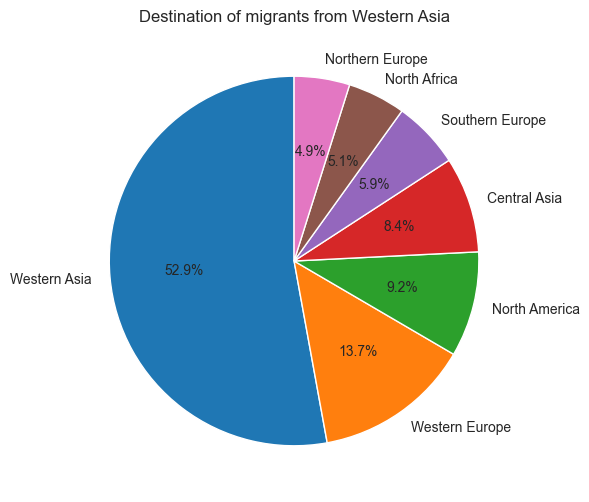

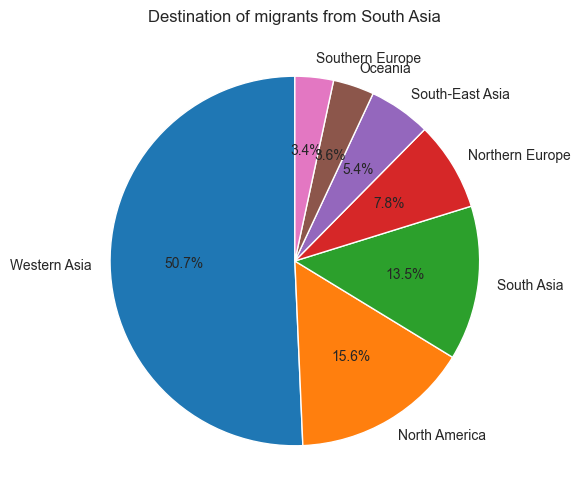

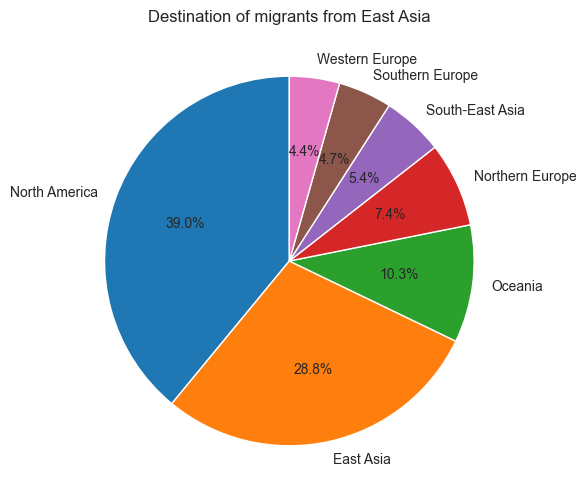

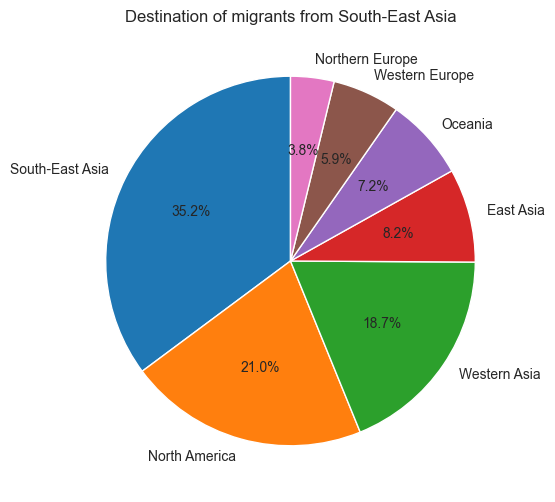

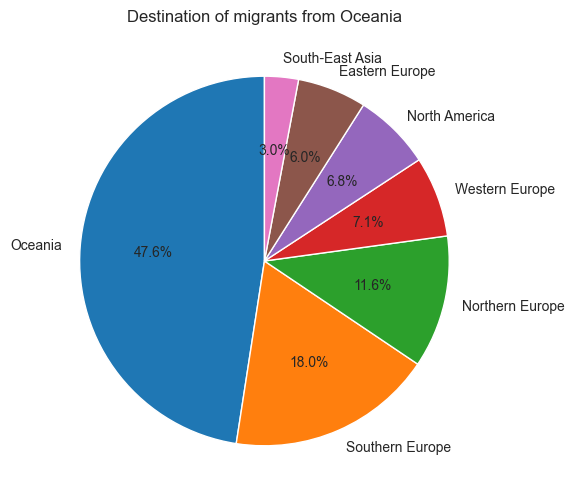

In [8]:
for region in list(df1.columns):    
    destination_migrants(df1, region)

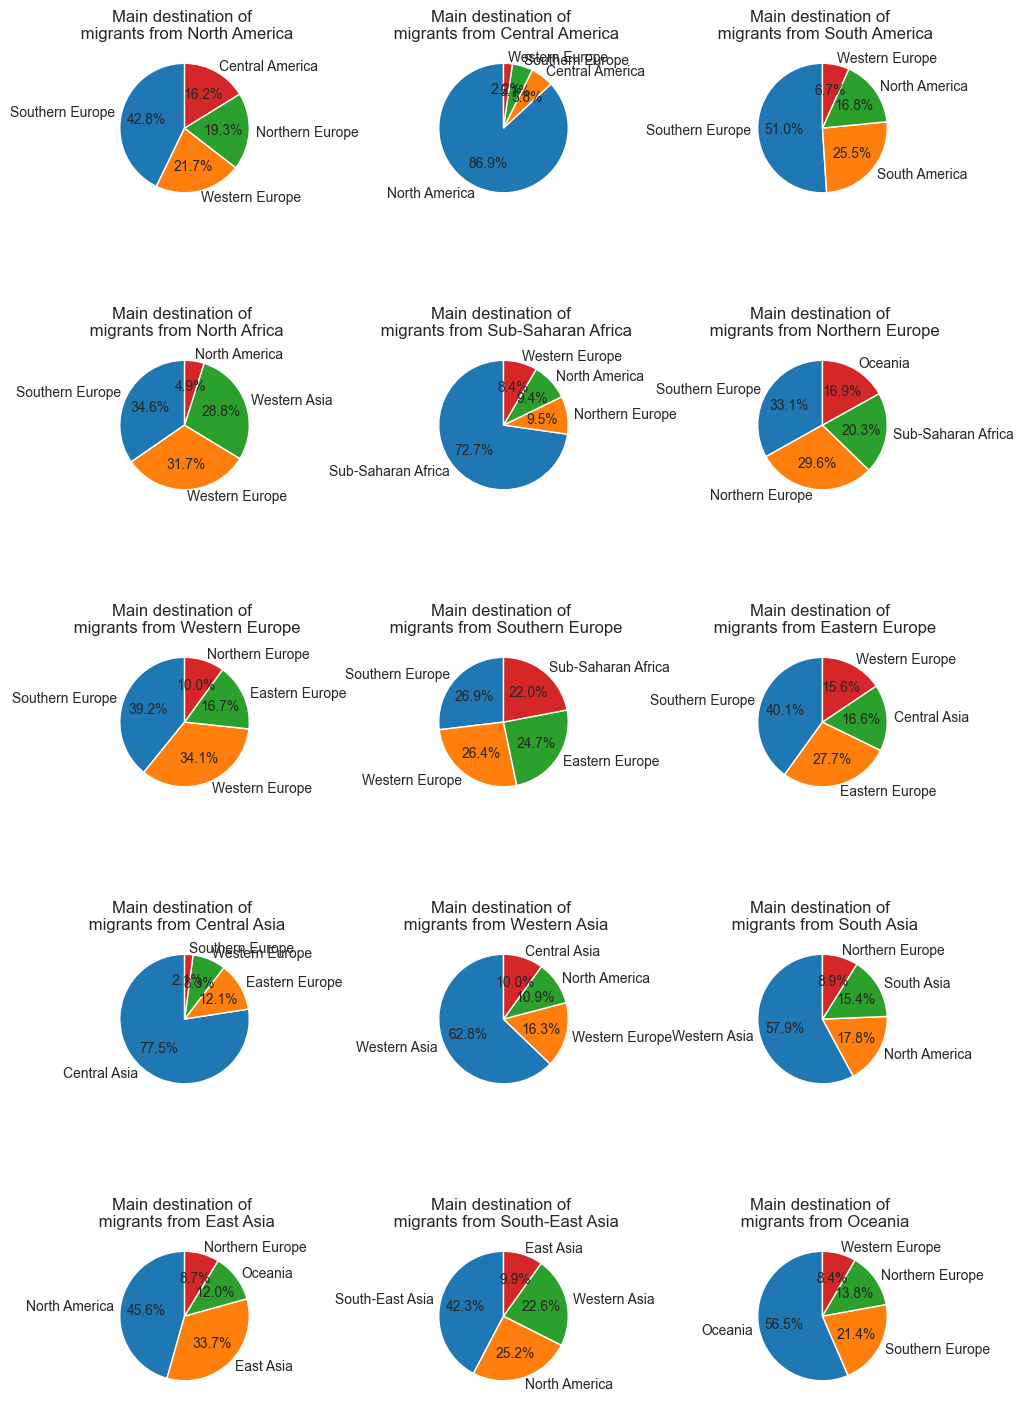

In [19]:
regions = list(df1.columns)
fig, axs = plt.subplots(5, 3, figsize=(10, 15)) 
c = 0
for i, region in enumerate(regions):
    if i%3==0:
        axs[c,0].pie(df1.loc[region].sort_values(ascending = False)[0:4], 
                    labels = df1.loc[region].sort_values(ascending = False)[0:4].index, 
                    autopct='%1.1f%%', 
                    startangle=90)
        axs[c,0].set_title(f'Main destination of \n migrants from {region}') 
    elif i%3==1: 
        axs[c,1].pie(df1.loc[region].sort_values(ascending = False)[0:4], 
                    labels = df1.loc[region].sort_values(ascending = False)[0:4].index, 
                    autopct='%1.1f%%', 
                    startangle=90)
        axs[c,1].set_title(f'Main destination of \n migrants from {region}')
    else: 
        axs[c,2].pie(df1.loc[region].sort_values(ascending = False)[0:4], 
                    labels = df1.loc[region].sort_values(ascending = False)[0:4].index, 
                    autopct='%1.1f%%', 
                    startangle=90)
        axs[c,2].set_title(f'Main destination of \n migrants from {region}')
        c+=1
plt.tight_layout()
plt.show()

### Let's draw these flows

In [31]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
world = gpd.read_file('DATA/world_boundaries')
list(world['region'].unique())

['Micronesia',
 'Eastern Asia',
 'Western Europe',
 'Southern Europe',
 'South America',
 'Central America',
 'Caribbean',
 'Northern Africa',
 'Western Africa',
 'Northern Europe',
 'Central Asia',
 'Middle Africa',
 'Western Asia',
 'Eastern Europe',
 'Eastern Africa',
 'South-Eastern Asia',
 'Polynesia',
 'Northern America',
 'Melanesia',
 nan,
 'Southern Asia',
 'Australia and New Zealand',
 'Southern Africa']

In [32]:
dico_continent = {'Micronesia' : 'Oceania',
 'Eastern Asia' : 'East Asia',
 'Western Europe' : 'Western Europe',
 'Southern Europe' : 'Southern Europe',
 'South America' : 'South America',
 'Central America' : 'Central America',
 'Caribbean' : 'South America',
 'Northern Africa' : 'North Africa',
 'Western Africa' : 'Sub-Saharan Africa',
 'Northern Europe' : 'Northern Europe',
 'Central Asia' : 'Central Asia',
 'Middle Africa' : 'Sub-Saharan Africa',
 'Western Asia' : 'Western Asia',
 'Eastern Europe' : 'Eastern Europe',
 'Eastern Africa' : 'Sub-Saharan Africa',
 'South-Eastern Asia' : 'South-East Asia',
 'Polynesia' : 'Oceania',
 'Northern America' : 'North America',
 'Melanesia' : 'Oceania',
 'Southern Asia' : 'South Asia',
 'Australia and New Zealand' : 'Oceania',
 'Southern Africa' : 'Sub-Saharan Africa'}
world['region'] = world['region'].replace(dico_continent)

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:6: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:6: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute ins

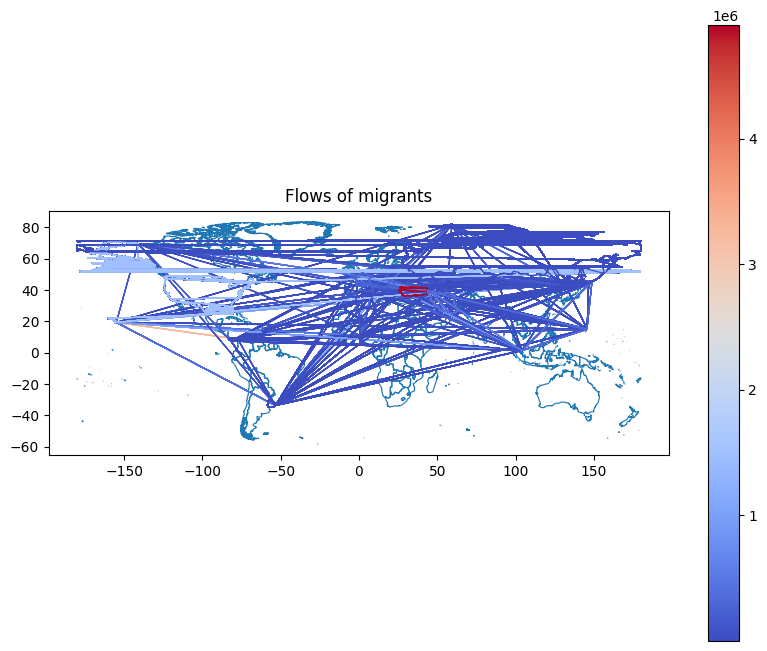

In [112]:
# Function to extract coordinates from a polygon or MultiPolygon
def extract_coordinates(geometry):
    coords = []
    if geometry.type == 'Polygon':
        return list(geometry.exterior.coords)
    elif geometry.type == 'MultiPolygon':
        for polygon in geometry.geoms:
            coords.extend(list(polygon.exterior.coords))
    return coords

def extract_geostart(region):
    geom_start = world[world['region'] == region]['geometry'].values[0]
    return extract_coordinates(geom_start)

# Your GeoDataFrame with migration data
flows = []

for index, row in df1.iterrows():
    for column, value in row.items():
        if value > 0:
            # Get geometries
            geom_start = world[world['region'] == index]['geometry'].values[0]
            geom_end = world[world['region'] == column]['geometry'].values[0]

            # Extract coordinates
            coords_start = extract_coordinates(geom_start)
            coords_end = extract_coordinates(geom_end)

            # Create geometry
            geometry = LineString(coords_start + coords_end)
            flows.append({'start': index, 'end': column, 'volume': value, 'geometry': geometry})

geo_data = gpd.GeoDataFrame(flows, crs="EPSG:4326")
geo_data = geo_data.set_geometry('geometry')

# Merging with world data
merged_data = world.merge(geo_data, left_on='region', right_on='start')

# Extract geo_start and geo_end
merged_data['geo_start'] = merged_data['start'].apply(extract_geostart)
merged_data['geo_end'] = merged_data['end'].apply(extract_geostart)

# Create a new GeoDataFrame with LineString geometries
gdf = gpd.GeoDataFrame(merged_data, geometry=[LineString(list(start) + list(end)) for start, end in zip(merged_data['geo_start'], merged_data['geo_end'])])

# Plot it
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=0.8)
gdf.plot(column='volume', cmap='coolwarm', linewidth=0.8, ax=ax, legend=True)
ax.set_title('Flows of migrants')
plt.show()


## EDA on dataset2

In [2]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
df2 = pd.read_csv('DATA/dataset2.csv')
df2_1 = pd.read_csv('DATA/dataset2_90_95.csv')
df2_2 = pd.read_csv('DATA/dataset2_95_00.csv')
df2_3 = pd.read_csv('DATA/dataset2_00_05.csv')
df2_4 = pd.read_csv('DATA/dataset2_05_10.csv')
df2.set_index('countries', inplace = True) 
df2.fillna(0, inplace=True)

In [21]:
total_migration(df2)

Destination of migrants 
 
 ABW          66852
AFG       10382540
AGO         802478
ALB         161986
ARE       10207736
           ...    
YEM        1520482
ZAF        5701078
ZMB         507548
ZWE         168294
TOTAL    314020958
Length: 197, dtype: int64 
 
 
There is 628041916 migrations in total


In [22]:
for region in list(df2.columns):
    try:
        pass
        #destination_migrants(df2, region)
    except Exception as e:
        print(f"Une erreur s'est produite pour le pays {region}: {e}")

### Which countries are missing ?

In [56]:
df_wiki = pd.read_csv('DATA/SCRAP_countries_ISO.csv')
df_wiki.drop('Unnamed: 0', axis = 1, inplace = True)
df_wiki.rename({'Alpha-3 code':'ISO'}, axis = 1, inplace = True)
df_wiki.sample(5)

,Country name,ISO
65,Egypt,EGY
211,Sudan,SDN
135,Malaysia,MYS
115,Kazakhstan,KAZ
174,Peru,PER


In [68]:
for i, iso in enumerate(df_wiki['ISO']):
    if iso not in list(df2.columns.drop('TOTAL')):
        print("ISO code", iso, "which corresponds to", df_wiki[df_wiki['ISO']==iso]['Country name'].to_list()[0], "country")

ISO code ALA which corresponds to Åland Islands country
ISO code ASM which corresponds to American Samoa country
ISO code AND which corresponds to Andorra country
ISO code AIA which corresponds to Anguilla country
ISO code ATA which corresponds to Antarctica country
ISO code ATG which corresponds to Antigua and Barbuda country
ISO code BMU which corresponds to Bermuda country
ISO code BES which corresponds to Bonaire Sint Eustatius Saba country
ISO code BVT which corresponds to Bouvet Island country
ISO code IOT which corresponds to British Indian Ocean Territory  country
ISO code CYM which corresponds to Cayman Islands  country
ISO code CXR which corresponds to Christmas Island country
ISO code CCK which corresponds to Cocos  country
ISO code COK which corresponds to Cook Islands  country
ISO code CUW which corresponds to Curaçao country
ISO code DMA which corresponds to Dominica country
ISO code FLK which corresponds to Falkland Islands  country
ISO code FRO which corresponds to Faro

## EDA on regions

In [31]:
df = pd.read_csv(f'DATA/from_countries_to_region/regions_00_05')
df.set_index('Unnamed: 0', inplace = True)
df[:][0:2]

,Central America,South Asia,Sub-Saharan Africa,Eastern Europe,Western Asia,South America,Oceania,Western Europe,South-East Asia,North America,Northern Europe,Central Asia,North Africa,Southern Europe
Unnamed: 0,,,,,,,,,,,,,,
Central America,204643,362,2404,3635,4291,42589,6150,74647,414,4054476,37187,3014,400,211686
South Asia,2822,1903789,43367,4888,2055796,1389,219683,142456,327597,1127535,505771,39156,4517,230783


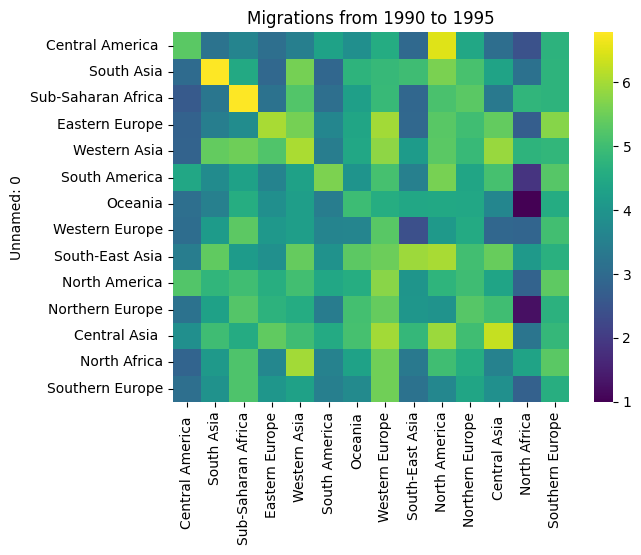

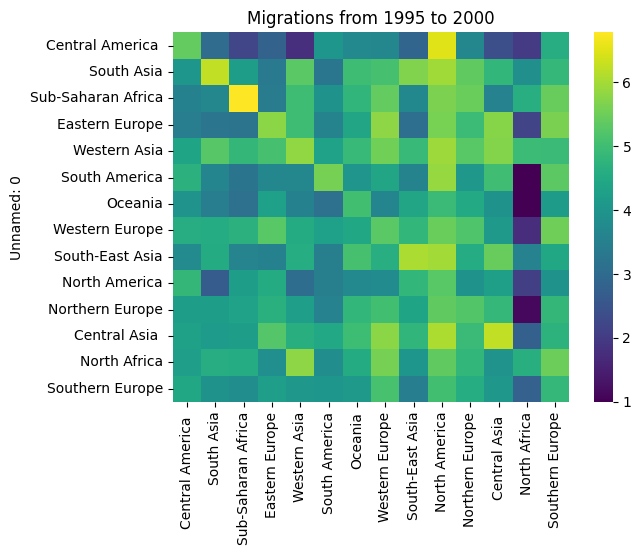

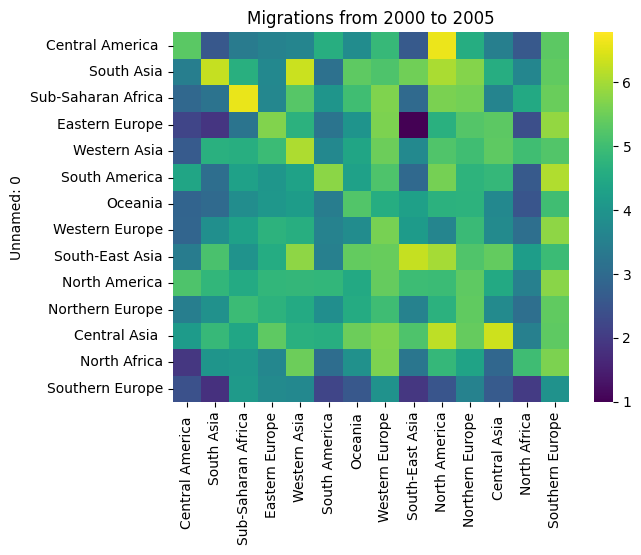

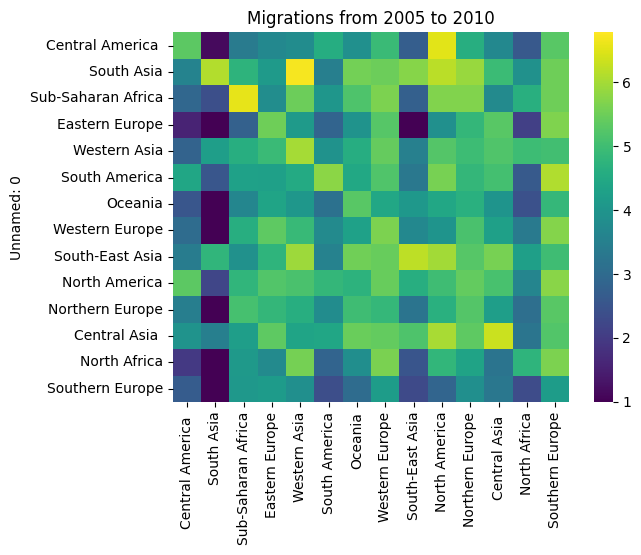

In [34]:
# We choose a logarithmic scale
liste = ['1990 to 1995', '1995 to 2000', '2000 to 2005', '2005 to 2010']
for i, dataframe in enumerate([pd.read_csv(f'DATA/from_countries_to_region/regions_'+year) for year in ['90_95', '95_00', '00_05', '05_10']]):
    dataframe.set_index('Unnamed: 0', inplace = True)
    log_data = np.log10(dataframe)
    sns.heatmap(log_data, cmap="viridis", vmin=np.log10(10), vmax=np.log10(6e6))
    plt.title(f'Migrations from {liste[i]}')
    plt.show()

We can do the same thing on datasets regularized by the total number of migrations

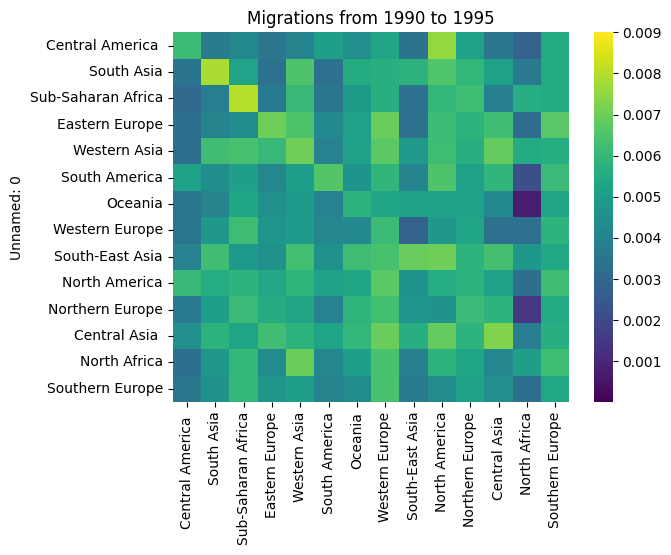

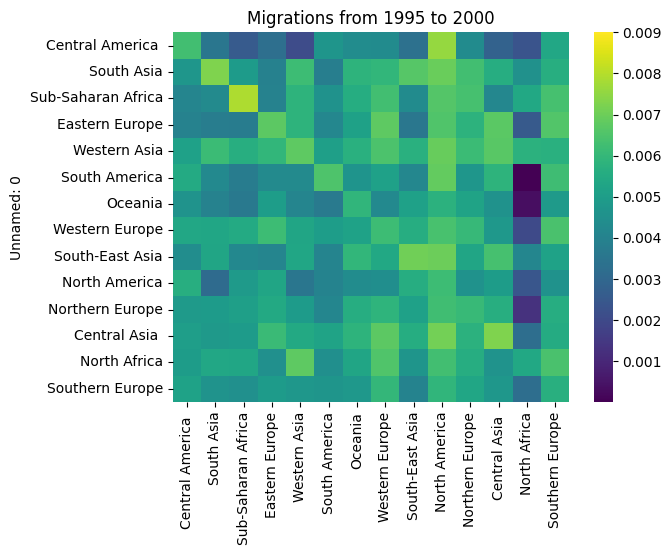

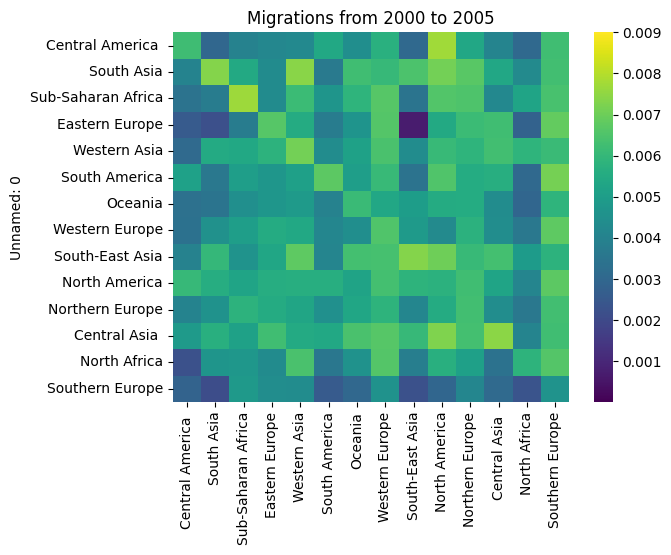

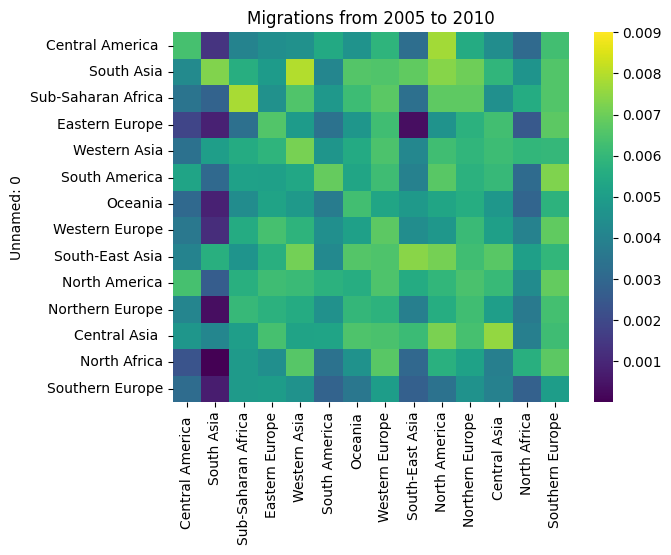

In [24]:
# logarithmic scale
liste = ['1990 to 1995', '1995 to 2000', '2000 to 2005', '2005 to 2010']
for i, dataframe in enumerate([pd.read_csv(f'DATA/from_countries_to_region/regions_'+year) for year in ['90_95', '95_00', '00_05', '05_10']]):
    dataframe.set_index('Unnamed: 0', inplace = True)
    dataframe = np.log10(dataframe)
    total = dataframe.sum().sum()
    regularized = dataframe / total
    linear_norm = Normalize(vmin=0.00001, vmax=0.009)
    sns.heatmap(regularized, cmap="viridis", norm=linear_norm)
    plt.title(f'Migrations from {liste[i]}')
    plt.show()

Get the trend of each period

In [3]:
liste = ['1990 to 1995', '1995 to 2000', '2000 to 2005', '2005 to 2010']
for i, dataframe in enumerate([pd.read_csv(f'DATA/from_countries_to_region/regions_'+year) for year in ['90_95', '95_00', '00_05', '05_10']]): 
    dataframe.set_index('Unnamed: 0', inplace = True)
    print("Period considered :", liste[i])   
    get_trend(dataframe)
    print("\n")

Period considered : 1990 to 1995
The 5 main population movements (based on regularized data) concern migrants moving from :
 Sub-Saharan Africa to Sub-Saharan Africa representing 18.803985304024213% of total migrations 
 South Asia to South Asia representing 14.191727247000562% of total migrations 
 Central America  to North America representing 7.571418027325355% of total migrations 
 Central Asia  to Central Asia  representing 4.5082715385477705% of total migrations 
 Western Asia to Western Asia representing 2.6980552765763974% of total migrations 



Period considered : 1995 to 2000
The 5 main population movements (based on regularized data) concern migrants moving from :
 Sub-Saharan Africa to Sub-Saharan Africa representing 16.97337726269676% of total migrations 
 Central America  to North America representing 9.180583670937434% of total migrations 
 South Asia to South Asia representing 4.9983700054305835% of total migrations 
 Central Asia  to Central Asia  representing 4.99619

In [3]:
#Obtenir la même chose que plus haut mais en français pour le overleaf
liste = ['1990 to 1995', '1995 to 2000', '2000 to 2005', '2005 to 2010']
for i, dataframe in enumerate([pd.read_csv(f'DATA/from_countries_to_region/regions_'+year) for year in ['90_95', '95_00', '00_05', '05_10']]): 
    dataframe.set_index('Unnamed: 0', inplace = True)
    print("Période considérée :", liste[i])   
    obtenir_tendance(dataframe)
    print("\n")

Période considérée : 1990 to 1995
Les 5 principaux mouvements de population (sur des données régularisées) concernent les migrants partant de :
 Sub-Saharan Africa to Sub-Saharan Africa Représentant 18.803985304024213% du total des migrations  
 South Asia to South Asia Représentant 14.191727247000562% du total des migrations  
 Central America  to North America Représentant 7.571418027325355% du total des migrations  
 Central Asia  to Central Asia  Représentant 4.5082715385477705% du total des migrations  
 Western Asia to Western Asia Représentant 2.6980552765763974% du total des migrations  



Période considérée : 1995 to 2000
Les 5 principaux mouvements de population (sur des données régularisées) concernent les migrants partant de :
 Sub-Saharan Africa to Sub-Saharan Africa Représentant 16.97337726269676% du total des migrations  
 Central America  to North America Représentant 9.180583670937434% du total des migrations  
 South Asia to South Asia Représentant 4.9983700054305835